# Pymaceuticals Inc. Analysis

- There is a positive correlation of 0.84 between the average tumor volume and the weight of the mouse

- Capomulin and Ramicane were the most successful drugs in decreasing tumor size in mice

- Infubinol appears to be the least effective treament with the highest mean tumor volume and largest variance of tumor volume.


In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mergedData = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mergedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [125]:
# Checking the number of mice.
numberOfMice = mergedData["Mouse ID"].nunique()
numberOfMice

249

In [127]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = mergedData.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicatesID = mergedData[duplicates]['Mouse ID'].unique()

# Display the duplicates
duplicatesID

array(['g989'], dtype=object)

In [129]:
# Optional: Get all the data for the duplicate mouse ID.
duplicateMouseData = mergedData.loc[mergedData['Mouse ID'] == duplicatesID[0], :]

duplicateMouseData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [131]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dataCleaned = mergedData[mergedData['Mouse ID'] != duplicatesID[0]]

dataCleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [133]:
# Checking the number of mice in the clean DataFrame.
numberOfMiceCleaned = dataCleaned["Mouse ID"].nunique()
numberOfMiceCleaned

248

## Summary Statistics

In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
tumorData = dataCleaned.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumorMean = tumorData['Tumor Volume (mm3)'].mean()
tumorMedian = tumorData['Tumor Volume (mm3)'].median()
tumorVariance = tumorData['Tumor Volume (mm3)'].var()
tumorSTD = tumorData['Tumor Volume (mm3)'].std()
tumorSEM = tumorData['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumorDataframe = pd.DataFrame({"mean" : tumorMean,
                               "median" : tumorMedian,
                               "variance" : tumorVariance,
                               "standard deviation" : tumorSTD,
                               "SEM" : tumorSEM})
tumorDataframe

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [138]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregationSummary = dataCleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std' , 'sem'])
aggregationSummary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

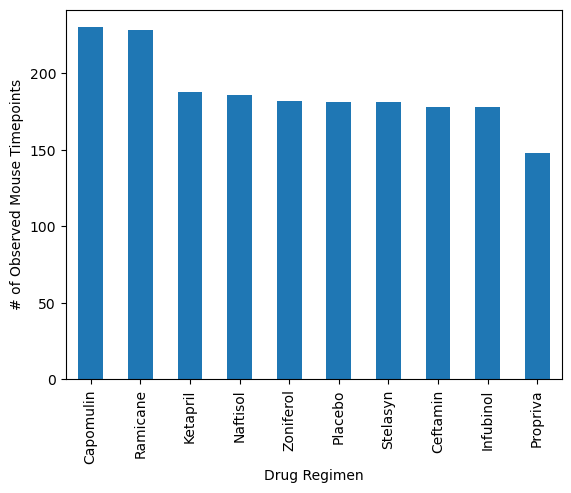

In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugTimepoints = dataCleaned.groupby(['Drug Regimen'])['Timepoint'].count()
drugTimepoints = drugTimepoints.sort_values(ascending=False)
drugTimepoints.plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

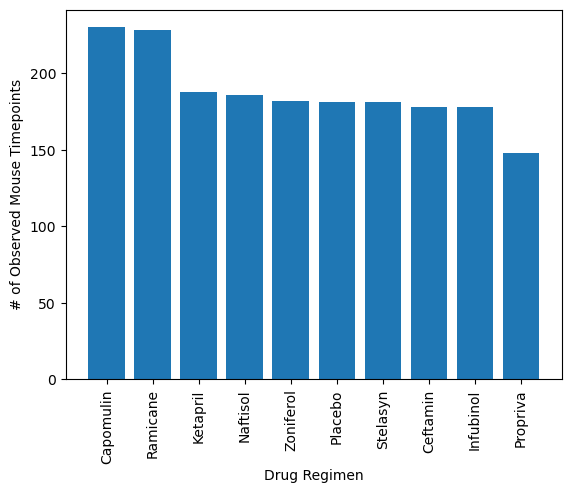

In [143]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drugTimepoints.index, drugTimepoints.values)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()

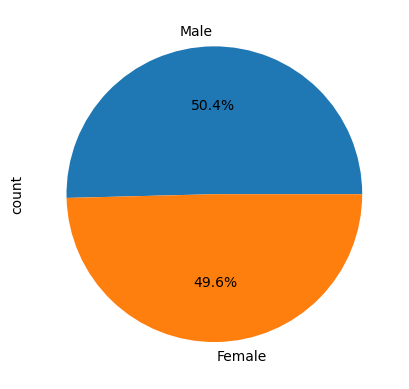

In [145]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
genderData = dataCleaned.groupby('Sex')['Mouse ID'].nunique().sort_values(ascending=False)

# Make the pie chart
genderData.plot.pie(autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

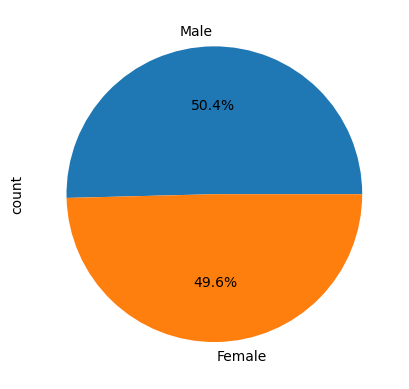

In [147]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender


# Make the pie chart
plt.pie(genderData, labels=("Male", "Female"), autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [150]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
allFinalTumorVolume = dataCleaned.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finalVolumeDataFrame = pd.merge(allFinalTumorVolume, dataCleaned, on=('Mouse ID', 'Timepoint'), how='left')
finalVolumeDataFrame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [152]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
secondList = []

regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
capomulin = finalVolumeDataFrame.loc[finalVolumeDataFrame['Drug Regimen'] == "Capomulin", :]
ramicane = finalVolumeDataFrame.loc[finalVolumeDataFrame['Drug Regimen'] == "Ramicane", :]
infubinol = finalVolumeDataFrame.loc[finalVolumeDataFrame['Drug Regimen'] == "Infubinol", :]
ceftamin = finalVolumeDataFrame.loc[finalVolumeDataFrame['Drug Regimen'] == "Ceftamin", :]

for drug in regimen:
    print(drug)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_df = finalVolumeDataFrame.loc[finalVolumeDataFrame['Drug Regimen'] == drug, :]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = filtered_df['Tumor Volume (mm3)'].astype(int).quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
        
    # Determine outliers using upper and lower bounds
    lowerBound = round(lowerq - (1.5*iqr),2)
    upperBound = round(upperq + (1.5*iqr),2)


    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lowerBound} could be {drug} outliers.")
    print(f"Values above {upperBound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")

Capomulin
------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.0
The upper quartile of Capomulin treatments is: 40.0
The interquartile range of Capomulin treatments is: 8.0
Values below 20.0 could be Capomulin outliers.
Values above 52.0 could be Capomulin outliers.
------------------------------------------------------------
Ramicane
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.0
The upper quartile of Ramicane treatments is: 40.0
The interquartile range of Ramicane treatments is: 9.0
Values below 17.5 could be Ramicane outliers.
Values above 53.5 could be Ramicane outliers.
------------------------------------------------------------
Infubinol
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.0
The upper quartile of Infubinol treatments is: 65.0
The interquartile range of Infubinol treatments is: 11.0
Va

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
11,a577,30,57.031862,2,Infubinol,Female,6,25
13,a685,45,66.083066,3,Infubinol,Male,8,30
27,c139,45,72.226731,2,Infubinol,Male,11,28
31,c326,5,36.321346,0,Infubinol,Female,18,25
41,c895,30,60.969711,2,Infubinol,Female,7,29
50,e476,45,62.435404,1,Infubinol,Male,23,26
56,f345,45,60.918767,1,Infubinol,Male,23,26
78,i386,40,67.289621,4,Infubinol,Female,23,29


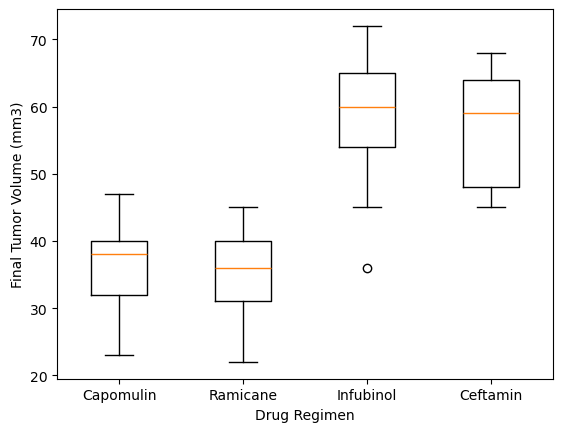

In [154]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data_to_plot = [capomulin['Tumor Volume (mm3)'].astype(int), ramicane['Tumor Volume (mm3)'].astype(int), infubinol['Tumor Volume (mm3)'].astype(int), ceftamin['Tumor Volume (mm3)'].astype(int)]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data_to_plot, labels=regimen)
plt.show()

## Line and Scatter Plots

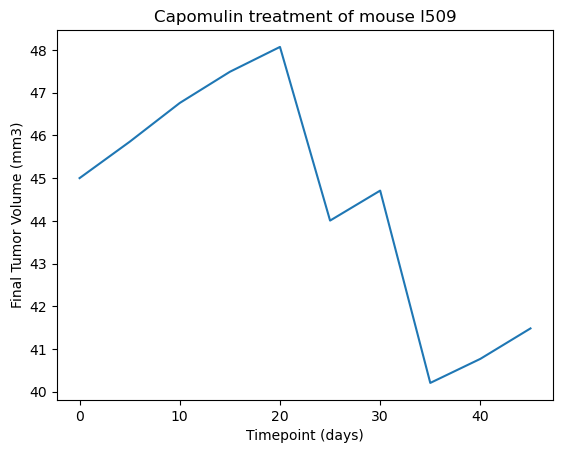

In [157]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
datal509 = dataCleaned.loc[dataCleaned['Mouse ID'] == "l509", :]

mouseTumorVol = datal509['Tumor Volume (mm3)']
mouseTimepoint = datal509['Timepoint']

plt.plot(mouseTimepoint, mouseTumorVol)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

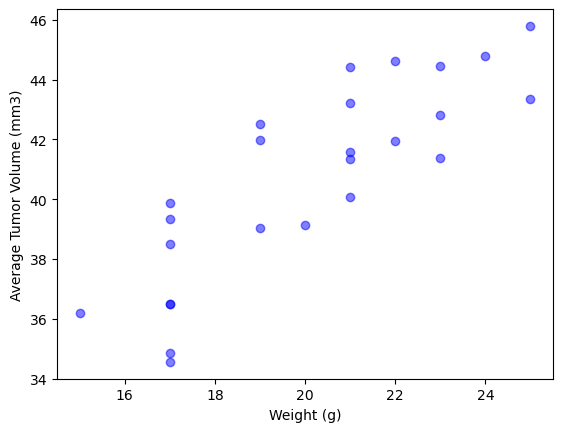

In [159]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinDataFrame = dataCleaned.loc[dataCleaned['Drug Regimen'] == 'Capomulin', :]

capomulinRegimen = capomulinDataFrame.groupby(['Mouse ID'])

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulinRegimen['Weight (g)'].mean(), capomulinRegimen['Tumor Volume (mm3)'].mean(), c="blue", alpha=0.5)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

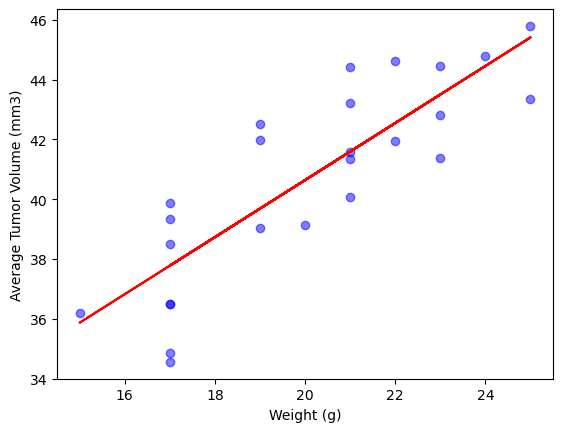

In [162]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulinRegimen['Weight (g)'].mean(), capomulinRegimen['Tumor Volume (mm3)'].mean(), c="blue", alpha=0.5)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = capomulinRegimen['Weight (g)'].mean().corr(capomulinRegimen['Tumor Volume (mm3)'].mean())

model = st.linregress(capomulinRegimen['Weight (g)'].mean(),capomulinRegimen['Tumor Volume (mm3)'].mean())
y_values = capomulinRegimen['Weight (g)'].mean() * model[0] + model[1]

plt.plot(capomulinRegimen["Weight (g)"].mean(), y_values, color="red")
plt.show()